<a href="https://colab.research.google.com/github/jinquan122/Palm-oil-and-chemical-ingredient-analysis/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.gofplots as sm
import datetime as dt
import pingouin as pg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.formula.api as smf

     |████████████████████████████████| 205 kB 21.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=9f5aadd8d0ae9fe927c70af8f49b6ff683be6f603482e90aad1113dc3b3fd2e5
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=efd7e14e1c5e07d6ca8db3ab0c92ec3e7e48d2a8230d9c4e4f7188c94610e2f1
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/MyDrive/palm_ffb.csv",index_col=False)

In [3]:
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [4]:
#set the format of date
df["Date"] = pd.to_datetime(df["Date"], format='%d.%m.%Y')

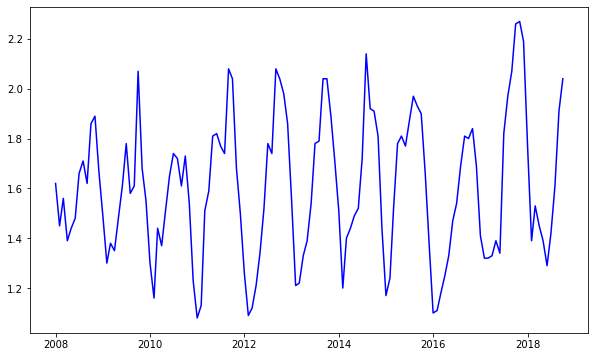

In [5]:
#Time series plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.Date, df.FFB_Yield, color='blue')

In [6]:
#Extract month as a variable from the date
df["month"] = df["Date"].dt.month
df["month"].astype("string")
df = df.drop("Date", axis=1)

In [7]:
df.dtypes

SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
month              int64
dtype: object

In [8]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,month
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231,6.423077
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751,3.434583
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000,1.000000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000,3.250000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000,6.000000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500,9.000000
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000,12.000000


In [9]:
#Check missing value
df.isna().sum()

SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
month            0
dtype: int64

In [10]:
#Check the correlation between variables
df.rcorr(stars=False)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,month
SoilMoisture,-,0.000,0.858,0.000,0.000,0.519,0.000,0.971,0.082
Average_Temp,-0.65,-,0.04,0.000,0.000,0.388,0.000,0.951,0.99
Min_Temp,0.016,0.18,-,0.157,0.000,0.439,0.783,0.24,0.007
Max_Temp,-0.5,0.761,-0.125,-,0.000,0.659,0.000,0.421,0.082
Precipitation,0.552,-0.369,0.346,-0.461,-,0.147,0.002,0.001,0.000
Working_days,-0.057,0.076,0.068,-0.039,0.128,-,0.581,0.187,0.688
HA_Harvested,-0.327,0.447,0.024,0.315,-0.266,0.049,-,0.000,0.000
FFB_Yield,-0.003,-0.005,0.104,-0.071,0.29,0.116,-0.35,-,0.000
month,0.153,-0.001,0.235,-0.153,0.444,0.036,-0.46,0.671,-


In [11]:
df.rcorr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,month
SoilMoisture,-,***,,***,***,,***,,
Average_Temp,-0.65,-,*,***,***,,***,,
Min_Temp,0.016,0.18,-,,***,,,,**
Max_Temp,-0.5,0.761,-0.125,-,***,,***,,
Precipitation,0.552,-0.369,0.346,-0.461,-,,**,***,***
Working_days,-0.057,0.076,0.068,-0.039,0.128,-,,,
HA_Harvested,-0.327,0.447,0.024,0.315,-0.266,0.049,-,***,***
FFB_Yield,-0.003,-0.005,0.104,-0.071,0.29,0.116,-0.35,-,***
month,0.153,-0.001,0.235,-0.153,0.444,0.036,-0.46,0.671,-


In [12]:
#Check the multicollinearity
vif_data = df.drop("FFB_Yield",axis=1)
X = vif_data.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


SoilMoisture        2.210340
Average_Temp        4.958425
Min_Temp            1.460197
Max_Temp            3.142248
Precipitation       2.214839
Working_days        1.062282
HA_Harvested        1.796779
month               1.846887
const            4802.761389
dtype: float64

In [13]:
#Shapiro Wilk testing for normality
p_value_a = "{:.4f}".format(stats.shapiro(df.SoilMoisture)[1])
p_value_b = "{:.4f}".format(stats.shapiro(df.Average_Temp)[1])
p_value_c = "{:.4f}".format(stats.shapiro(df.Min_Temp)[1])
p_value_d = "{:.4f}".format(stats.shapiro(df.Max_Temp)[1])
p_value_e = "{:.4f}".format(stats.shapiro(df.Precipitation)[1])
p_value_f = "{:.4f}".format(stats.shapiro(df.Working_days)[1])
p_value_g = "{:.4f}".format(stats.shapiro(df.HA_Harvested)[1])
p_value_h = "{:.4f}".format(stats.shapiro(df.month)[1])
p_value_i = "{:.4f}".format(stats.shapiro(df.FFB_Yield)[1])

data = [["SoilMoisture",p_value_a],["Average_Temp",p_value_b],["Min_Temp",p_value_c],["Max_Temp",p_value_d],["Precipitation",p_value_e],["Working_days",p_value_f],["HA_Harvested",p_value_g],["month",p_value_h],["FFB_Yield",p_value_i]]
p_value = pd.DataFrame(data, columns =["Feature","P-value"])
p_value

,Feature,P-value
0,SoilMoisture,0.0835
1,Average_Temp,0.1366
2,Min_Temp,0.0000
3,Max_Temp,0.2032
4,Precipitation,0.0365
5,Working_days,0.0000
6,HA_Harvested,0.1925
7,month,0.0000
8,FFB_Yield,0.0963


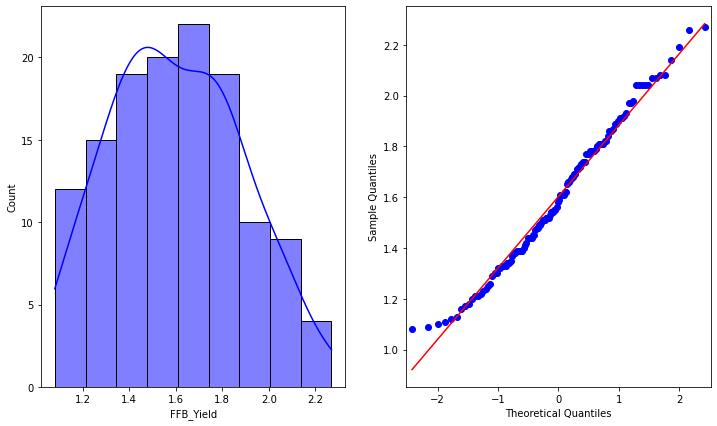

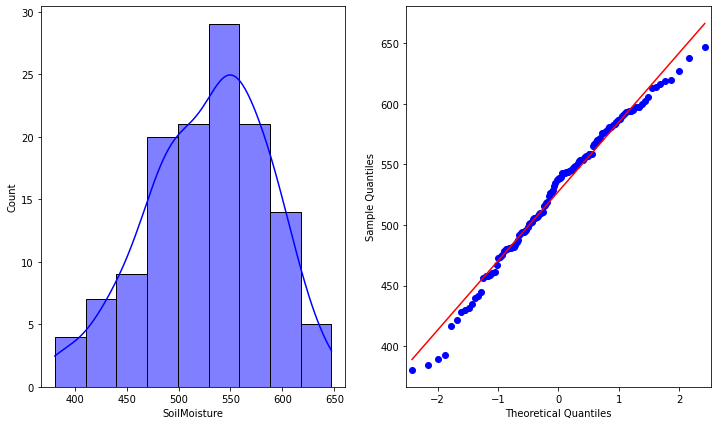

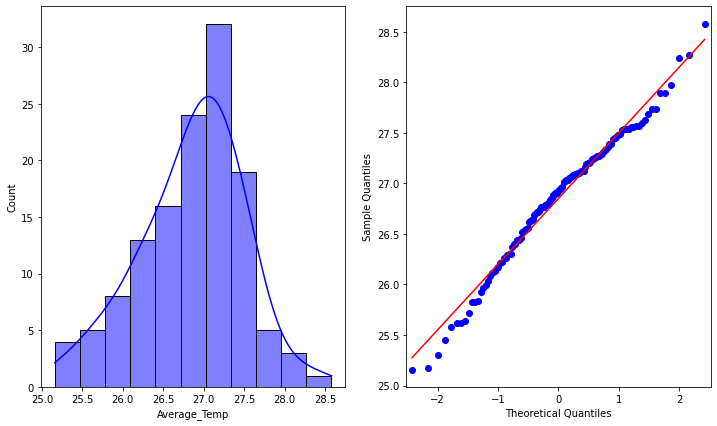

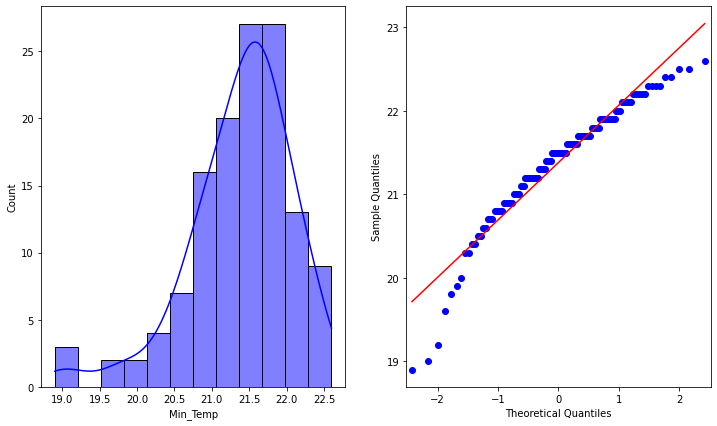

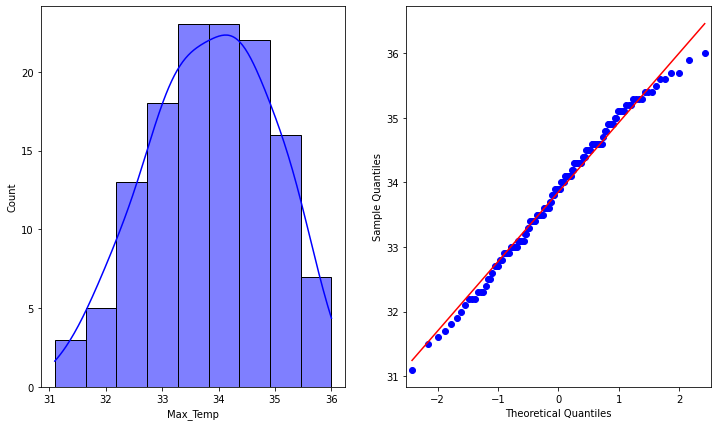

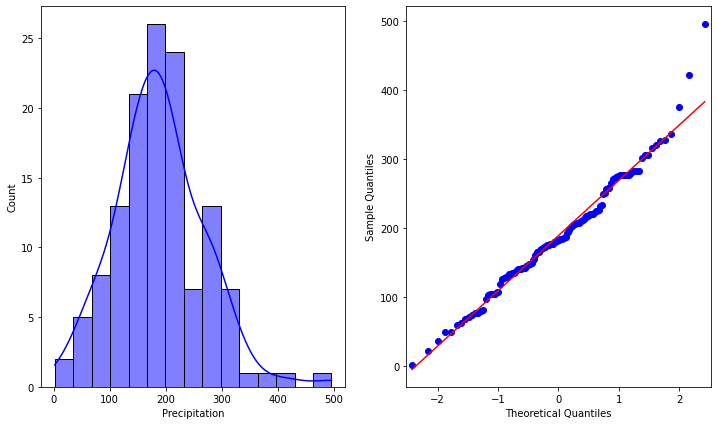

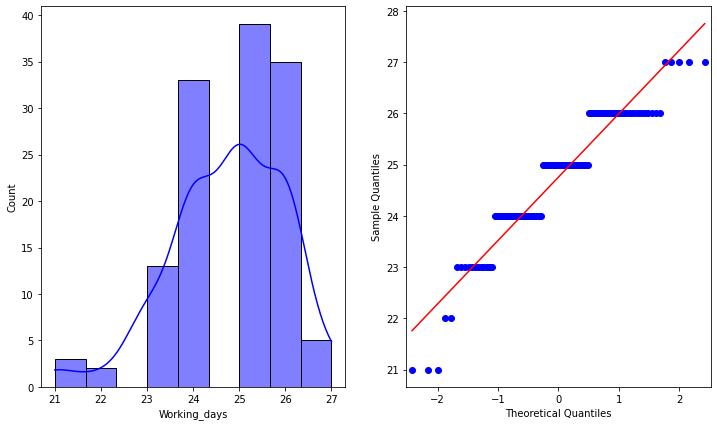

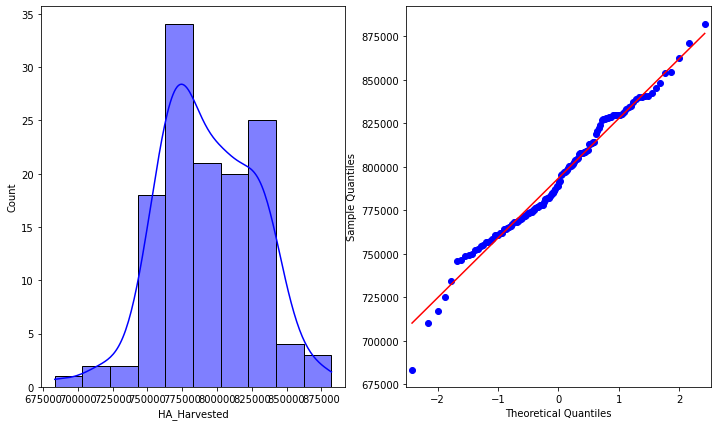

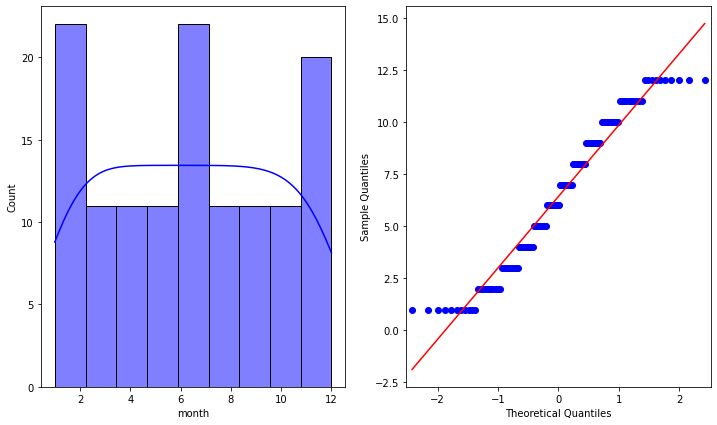

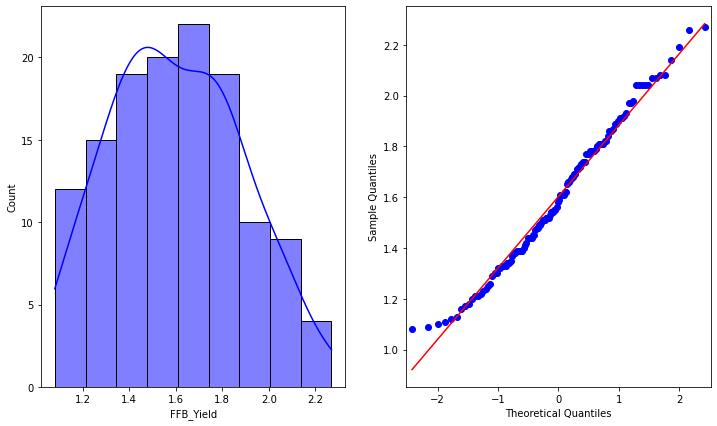

In [14]:
#Data distribution and Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.SoilMoisture, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.SoilMoisture).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.Average_Temp, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.Average_Temp).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.Min_Temp, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.Min_Temp).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.Max_Temp, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.Max_Temp).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.Precipitation, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.Precipitation).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.Working_days, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.Working_days).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.HA_Harvested, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.HA_Harvested).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.month, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.month).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.FFB_Yield, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.FFB_Yield).qqplot(line='s', ax=ax[1])

In [15]:
#Apply square root transformation 
to_log = ['Min_Temp', 'Precipitation']
df[to_log] = df[to_log].applymap(lambda x: np.sqrt(x))

In [16]:
#Regression Analysis modelling
results = smf.ols(formula="FFB_Yield ~ month + HA_Harvested + Working_days + Precipitation + Max_Temp + Min_Temp + Average_Temp + SoilMoisture", data=df).fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     15.06
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           3.74e-15
Time:                        01:22:41   Log-Likelihood:                 25.620
No. Observations:                 130   AIC:                            -33.24
Df Residuals:                     121   BIC:                            -7.433
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8095      1.608      2.368